Let's construct the system of equations based on the diagrams of forces below.

$$ F_{1} - f_{1} - N_{0x} = M_{1}a_{1} $$
$$ T - f_{2} = M_{2}a_{2} $$
$$ -F_{1} = M_{3}a_{3x} $$
$$ 2f_{3} + T - M_{3}g = M_{3}a_{3y} $$
$$ N_{0x} - T = M_{0}a_{0} = 0 $$

Constraints(the derivation can be found in the solution of the quiz):
$$ a_{1} - a_{2} - a_{3y} = 0 $$
$$ a_{1} = a_{3x} $$

<img src="fd.png">

Let's note that
$$ f_{1} = \mu_{1}N_{1} $$
$$ f_{2} = \mu_{2}N_{2} $$
$$ f_{3} = \mu_{3}F_{1} $$
are forces emerged because of friction.
Where
$$ N_{1} = M_{1}g + N_{2} + N_{0y}$$
$$ N_{2} = M_{2}g $$
$$ N_{0y} = T\sqrt{2}/2 $$ from the diagram of M0


From the system of equations above, we can find $ x_{1}(t), x_{2}(t), y_{3}(t)$. Having the mentioned functions. We will be able to calculate their values at a given time $t$.

IMPORTANT NOTE: After several changes, it is important to say that the pictures of my calculations are not valid anymore. 

In [6]:
import numpy as np

In [95]:
M1 = 1
M2 = 5
M3 = 30000
mu1 = 0.09
mu2 = 3
mu3 = 0.1
g = 10

# General solution of the system

In [96]:
# The system of linear equations (see images calcs1.jpeg and calcs2.jpeg for more detail)
A = np.array([[-(M1 + M3), -M2], [-(2*mu3*M3 + M3), M2 + M3]])
b = np.array([[M2*mu2*g + M1*mu1*g + M2*mu1*g, M3*g - M2*mu2*g]])

In [97]:
# Solve
a = np.linalg.inv(A).dot(b.T)
a = np.squeeze(a)

In [98]:
a1 = [a[0], 0]
a2 = [a[1], 0]
a3 = [a1[0], a[0] - a2[0]]

a1, a2, a3

([-0.006843959045027291, 0],
 [9.985123061968974, 0],
 [-0.006843959045027291, -9.991967021014])

# Our problem

In [99]:
# I don't really get why we need to get F as an inpuy if we can find it from the system of linear equations I presented above
# but anyways, in that case a1 = -F/M3 and a2 = (T - mu2*M2*g)/M2, where T = F - mu1*g*(M1 + M2) - M1*a1
def compute_accelerations(F):
    a1 = -F/M3
    T =  F - mu1*g*(M1 + M2) - M1*a1
    a2 = (T - mu2*M2*g)/M2
    
    a1 = [a1, 0]
    a2 = [a2, 0]
    a3 = [a1[0], a1[0] - a2[0]]
    
    return a1, a2, a3
    

In [100]:
# Just an example of t and F, it should be changed by the data on which the program should work
t = np.linspace(1, 20, 30)
F = np.random.random(30)*(-1) + 300

In [101]:
t

array([ 1.        ,  1.65517241,  2.31034483,  2.96551724,  3.62068966,
        4.27586207,  4.93103448,  5.5862069 ,  6.24137931,  6.89655172,
        7.55172414,  8.20689655,  8.86206897,  9.51724138, 10.17241379,
       10.82758621, 11.48275862, 12.13793103, 12.79310345, 13.44827586,
       14.10344828, 14.75862069, 15.4137931 , 16.06896552, 16.72413793,
       17.37931034, 18.03448276, 18.68965517, 19.34482759, 20.        ])

In [102]:
v1 = 0; v2 = 0; v3 = 0
x1 = [0, 0]
x2 = [0, 0]
x3 = [0, 0]

In [103]:
positions = []
for i in range(len(t)):
    a1, a2, a3 = compute_accelerations(F[i])
    x1[0] += v1*t[i] + a1[0]*(t[i]**2)/2
    v1 += a1[0]*t[i]
    x2[0] += v2*t[i] + a2[0]*(t[i]**2)/2
    v2 += a2[0]*t[i]
    x3[0] = x1[0]
    x3[1] += v3*t[i] + a3[1]*(t[i]**2)/2
    v3 += a3[1]*t[i]
    positions.append([x1.copy(), x2.copy(), x3.copy()])

In [104]:
import matplotlib.pyplot as plt

In [105]:
positions = np.array(positions)

Text(0, 0.5, 'x-coordinates')

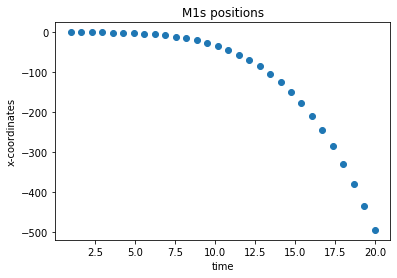

In [106]:
x1s = positions[:,0,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(t, x1s_x)
plt.title('M1s positions')
plt.xlabel('time')
plt.ylabel('x-coordinates')

Text(0, 0.5, 'x-coordinates')

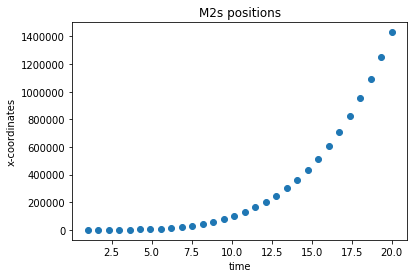

In [107]:
x1s = positions[:,1,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(t, x1s_x)
plt.title('M2s positions')
plt.xlabel('time')
plt.ylabel('x-coordinates')

Text(0, 0.5, 'x-coordinates')

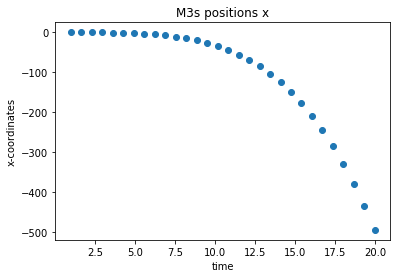

In [108]:
x1s = positions[:,2,:]

x1s_x = x1s[:, 0]
x1s_y = x1s[:, 1]

plt.scatter(t, x1s_x)
plt.title('M3s positions x')
plt.xlabel('time')
plt.ylabel('x-coordinates')

Text(0, 0.5, 'y-coordinates')

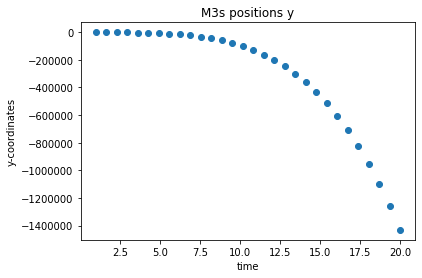

In [109]:
plt.scatter(t, x1s_y)
plt.title('M3s positions y')
plt.xlabel('time')
plt.ylabel('y-coordinates')

# Conclusion-report

From the results above we can see that tweaking the parameters of masses and/or friction coefficients has great impact on the positions of the objects. Also we can see that I have done something wrong, because when M1 moves to the left (since the x-coordinates are negative) M2 moves to the right with drastic and unimaginable steps. This cannot happen. The same can be said about the vertical movement of M3, the coordinate values are too big.
I've changed the force diagrams and respectively the system of the equations is also changed, which will result in the change of solution.